In [2]:
#install.packages("ibdsim2")
#install.packages("abc") 
library(ibdsim2)
library(abc)
# Read the file
file_path <- "/Users/undralganbaatar/Downloads/ibd_data.txt"

# Read the first few rows to inspect structure
ibd_data <- read.table(file_path, header = TRUE, sep = "\t")  # If tab-separated

colnames(ibd_data) <- c(
  "Sample1", "Sample2", "Chromosome", "PhysicalStart", "PhysicalEnd",
  "IBDType", "GeneticStart", "GeneticEnd", "GeneticLength"
)

# Check if the column names are updated
colnames(ibd_data)

Loading required package: pedtools

Loading required package: abc.data

Loading required package: nnet

Loading required package: quantreg

Loading required package: SparseM

Loading required package: MASS

Loading required package: locfit

locfit 1.5-9.12 	 2025-03-05



[1] "Sample1"       "Sample2"       "Chromosome"    "PhysicalStart"
[5] "PhysicalEnd"   "IBDType"       "GeneticStart"  "GeneticEnd"   
[9] "GeneticLength"

In [3]:
head(ibd_data)

,Sample1,Sample2,Chromosome,PhysicalStart,PhysicalEnd,IBDType,GeneticStart,GeneticEnd,GeneticLength
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,1,752721,249170711,IBD1,0,261.7134,261.7134
2,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,2,118913,243043959,IBD1,0,248.7068,248.7068
3,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,3,108226,197800244,IBD1,0,216.8492,216.8492
4,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,4,167596,190936728,IBD1,0,200.2259,200.2259
5,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,5,157856,180692833,IBD1,0,196.3389,196.3389
6,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,6,183917,170981684,IBD1,0,183.8357,183.8357


In [4]:
library(dplyr)

# Function to extract generation number (g1, g2, etc.)
extract_generation <- function(sample_name) {
  match <- regexpr("g[0-9]+", sample_name)  # Find pattern "gX"
  if (match > 0) {
    return(as.numeric(sub("g", "", regmatches(sample_name, match))))  # Extract number
  } else {
    return(NA)
  }
}

# Apply function to both Sample1 and Sample2
ibd_data <- ibd_data %>%
  mutate(
    Gen1 = sapply(Sample1, extract_generation),
    Gen2 = sapply(Sample2, extract_generation)
  )

# Check distribution of generations
table(ibd_data$Gen1)
table(ibd_data$Gen2)



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





      1       2       3       4       5 
  54021  137065  720531 2939509 5958042 


      2       3       4       5 
    548   19882  446227 9342511 

In [5]:
ibd_data_filtered <- ibd_data %>%
  filter(Gen1 %in% 1:3 & Gen2 %in% 1:3)

dim(ibd_data_filtered) 
head(ibd_data_filtered)


[1] 20430    11

,Sample1,Sample2,Chromosome,PhysicalStart,PhysicalEnd,IBDType,GeneticStart,GeneticEnd,GeneticLength,Gen1,Gen2
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,1,752721,249170711,IBD1,0,261.7134,261.7134,1,2
2,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,2,118913,243043959,IBD1,0,248.7068,248.7068,1,2
3,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,3,108226,197800244,IBD1,0,216.8492,216.8492,1,2
4,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,4,167596,190936728,IBD1,0,200.2259,200.2259,1,2
5,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,5,157856,180692833,IBD1,0,196.3389,196.3389,1,2
6,minervaPed1_g1-b1-s1,minervaPed1_g2-b1-i1,6,183917,170981684,IBD1,0,183.8357,183.8357,1,2


In [6]:
colnames(ibd_data_filtered)

[1] "Sample1"       "Sample2"       "Chromosome"    "PhysicalStart"
 [5] "PhysicalEnd"   "IBDType"       "GeneticStart"  "GeneticEnd"   
 [9] "GeneticLength" "Gen1"          "Gen2"

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(count)` instead."


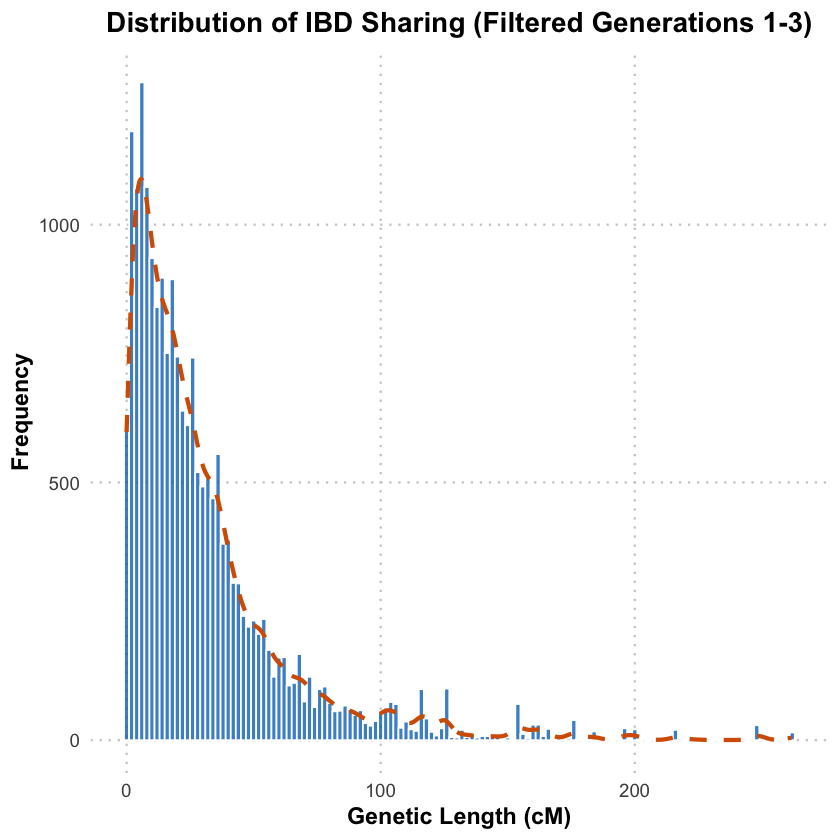

In [7]:
library(ggplot2)

ggplot(ibd_data_filtered, aes(x = GeneticLength)) +
  geom_histogram(binwidth = 2, fill = "#0073C2", color = "white", alpha = 0.8) +
  geom_density(aes(y = ..count.. * 2), color = "#D55E00", size = 1.2, linetype = "dashed") +
  labs(title = "Distribution of IBD Sharing (Filtered Generations 1-3)",
       x = "Genetic Length (cM)",
       y = "Frequency") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title = element_text(face = "bold"),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "grey80", linetype = "dotted")
  )



Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message in geom_edge_link(aes(size = 0.1), alpha = 0.6, color = "blue"):
"Ignoring unknown aesthetics: edge_size"
Warning message:
"The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
i Please use the `transform` argument instead."


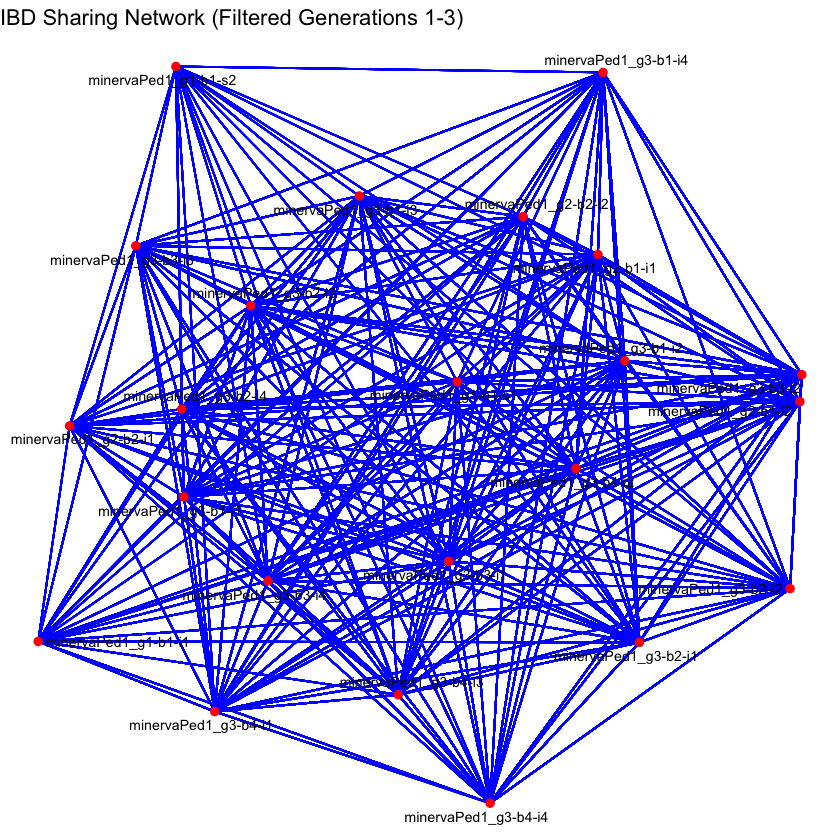

In [8]:
library(igraph)
library(ggraph)

# Create network graph from filtered data
ibd_graph_filtered <- graph_from_data_frame(ibd_data_filtered %>%
                                              select(Sample1, Sample2, GeneticLength), 
                                            directed = FALSE)

# Assign edge weights (IBD Sharing)
E(ibd_graph_filtered)$weight <- ibd_data_filtered$GeneticLength

# Generate the network visualization
ggraph(ibd_graph_filtered, layout = "nicely") +
  geom_edge_link(aes(size = 0.1), alpha = 0.6, color = "blue") +
  geom_node_point(size = 2, color = "red") +
  geom_node_text(aes(label = name), repel = TRUE, size = 3) +
  labs(title = "IBD Sharing Network (Filtered Generations 1-3)") +
  theme_void() +
  theme(legend.position = "none")



Attaching package: 'tidyr'


The following object is masked from 'package:igraph':

    crossing




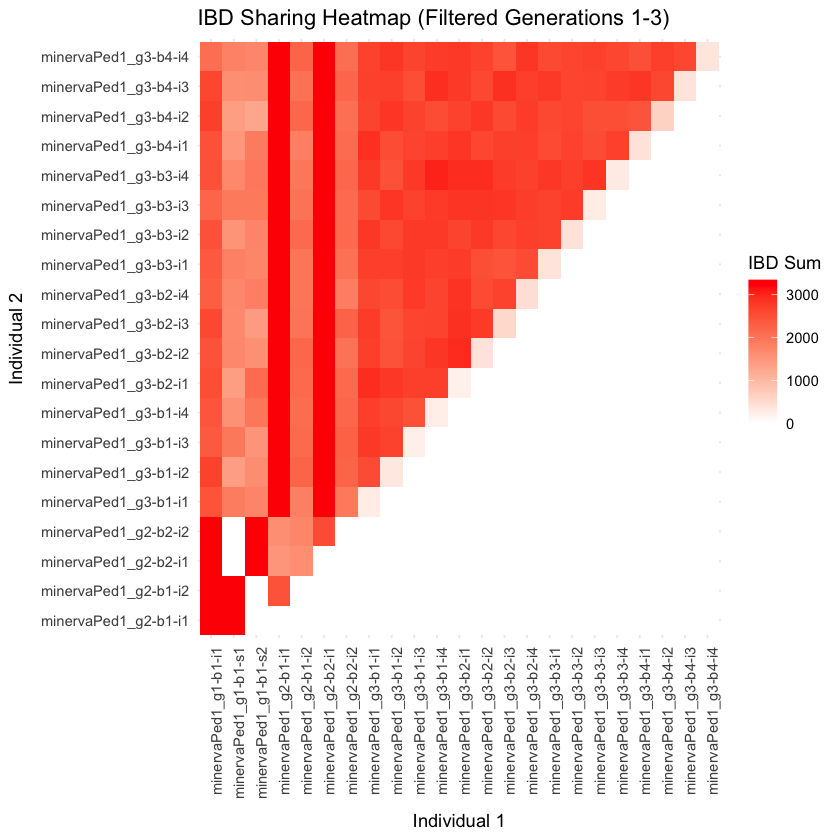

In [9]:
library(tidyr)
library(dplyr)
library(ggplot2)

# Aggregate sum of GeneticLength for each (Sample1, Sample2) pair
heatmap_data_filtered <- ibd_data_filtered %>%
  group_by(Sample1, Sample2) %>%
  summarise(IBD_Sum = sum(GeneticLength, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(names_from = Sample2, values_from = IBD_Sum, values_fill = list(IBD_Sum = 0)) %>%
  pivot_longer(-Sample1, names_to = "Sample2", values_to = "IBD_Sum")

# Plot the heatmap
ggplot(heatmap_data_filtered, aes(x = Sample1, y = Sample2, fill = IBD_Sum)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "IBD Sharing Heatmap (Filtered Generations 1-3)",
       x = "Individual 1",
       y = "Individual 2",
       fill = "IBD Sum") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [10]:
parent_child_ibd <- ibd_data_filtered %>%
  filter((Sample1 == "minervaPed1_g1-b1-i1" & Sample2 == "minervaPed1_g2-b1-i1") | 
         (Sample1 == "minervaPed1_g2-b1-i1" & Sample2 == "minervaPed1_g1-b1-i1"))

# Sum up the total shared IBD
total_ibd_length <- sum(parent_child_ibd$GeneticLength, na.rm = TRUE)

print(paste("Total Shared IBD:", total_ibd_length, "cM"))


[1] "Total Shared IBD: 3346.298892 cM"


In [11]:
parent_child_ibd <- ibd_data_filtered %>%
  filter((Sample1 == "minervaPed1_g3-b1-i1" & Sample2 == "minervaPed1_g2-b1-i1") | 
         (Sample1 == "minervaPed1_g2-b1-i1" & Sample2 == "minervaPed1_g3-b1-i1"))

# Sum up the total shared IBD
total_ibd_length <- sum(parent_child_ibd$GeneticLength, na.rm = TRUE)

print(paste("Total Shared IBD:", total_ibd_length, "cM"))

[1] "Total Shared IBD: 3346.297514 cM"


These 2 individuals are parent-child as seen from the ~3400 cM shared ibd length. The pedigree structure given is correct in this case.

In [12]:
multiway_ibd <- ibd_data_filtered %>%
  filter((Sample1 %in% c("minervaPed1_g1-b1-i1", "minervaPed1_g2-b1-i2", "minervaPed1_g3-b1-i1") & 
          Sample2 %in% c("minervaPed1_g1-b1-i1", "minervaPed1_g2-b1-i2", "minervaPed1_g3-b1-i1")) |
         (Sample2 %in% c("minervaPed1_g1-b1-i1", "minervaPed1_g2-b1-i2", "minervaPed1_g3-b1-i1") & 
          Sample1 %in% c("minervaPed1_g1-b1-i1", "minervaPed1_g2-b1-i2", "minervaPed1_g3-b1-i1")))


parent_child_ibd <- ibd_data_filtered %>%
  filter((Sample1 == "minervaPed1_g1-b1-i1" & Sample2 == "minervaPed1_g3-b1-i1") | 
         (Sample1 == "minervaPed1_g3-b1-i1" & Sample2 == "minervaPed1_g1-b1-i1"))

# Sum up the total shared IBD
total_ibd_length <- sum(parent_child_ibd$GeneticLength, na.rm = TRUE)

print(paste("Total Shared IBD:", total_ibd_length, "cM"))

[1] "Total Shared IBD: 2465.61938 cM"


From this, we see that g1b1i1 and g3b1i1 have a second degree relationship. If we trust the provided pedigree information, they should be grandparent-child. However, the high total shared IBD suggests that they are half-siblings. Let's see if the ABC method can detect it.

Creating new mother: 1

Creating new mother: 4

Creating new mother: 1

Creating new mother: 1

Creating new mother: 4



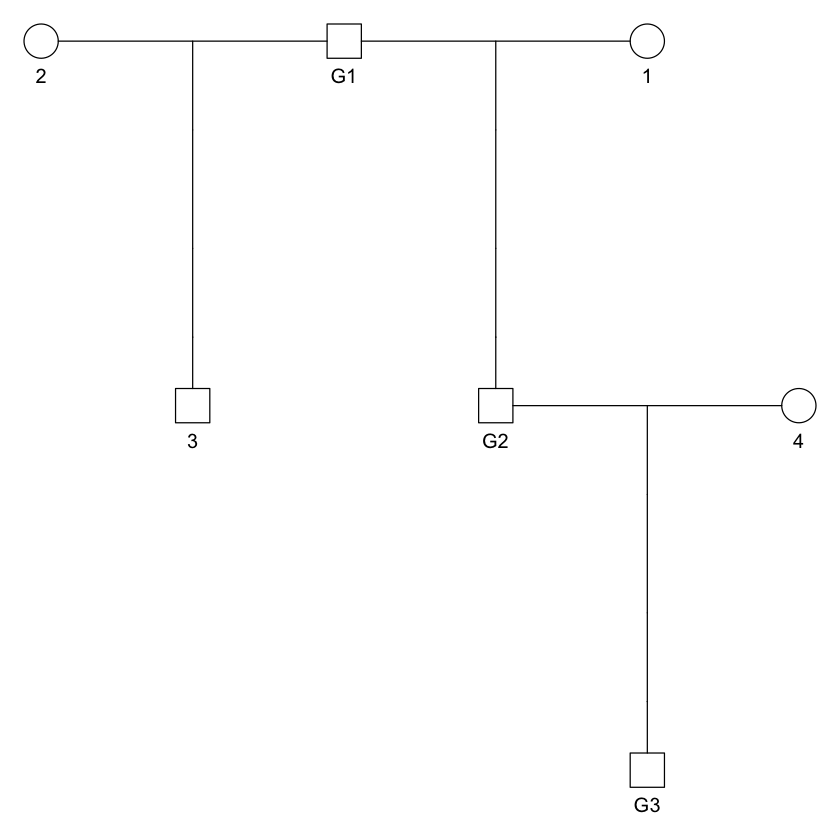

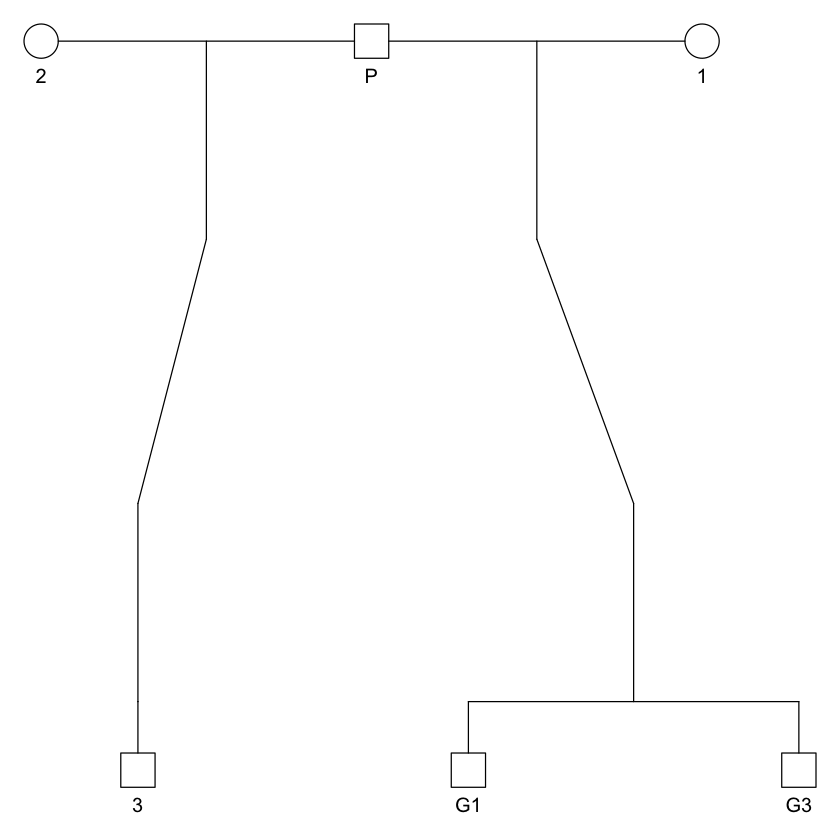

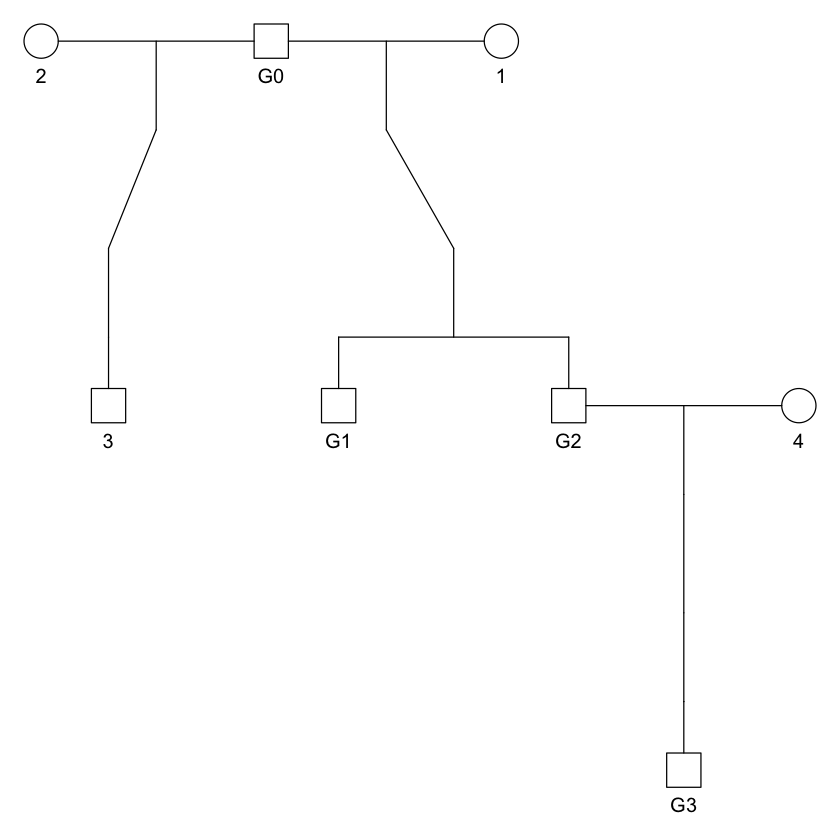

In [13]:
library(ibdsim2)

# Grandparent-Grandchild Pedigree (g1 → g2 → g3)
ped_grandparent <- nuclearPed(father = "G1") %>%
  addChildren(father = "G1", ids = "G2") %>%  # G1 (Grandparent) → G2 (Parent)
  addChildren(father = "G2", ids = "G3")      # G2 (Parent) → G3 (Child)

# Half-Sibling Pedigree (g1 and g3 share one parent)
ped_half_sibling <- nuclearPed(father = "P") %>%
  addChildren(father = "P", ids = c("G1", "G3"))  # G1 and G3 are half-siblings via shared parent P

# Aunt/Uncle-Niece/Nephew Pedigree (G1 and G2 are siblings, G3 is child of G2)
ped_avuncular <- nuclearPed(father = "G0") %>%
  addChildren(father = "G0", ids = c("G1", "G2")) %>%  # G1 & G2 are siblings
  addChildren(father = "G2", ids = "G3")              # G3 is child of G2


plot(ped_grandparent)
plot(ped_half_sibling)
plot(ped_avuncular)


In [14]:
# Simulating IBD Sharing for Each Relationship Hypothesis
sim_grandparent <- ibdsim(ped_grandparent, N = 1000)  # Grandparent-Grandchild
sim_half_sibling <- ibdsim(ped_half_sibling, N = 1000)  # Half-Siblings
sim_avuncular <- ibdsim(ped_avuncular, N = 1000)  # Aunt/Uncle

# Check if simulation worked
print(length(sim_grandparent))
#print(length(sim_half_sibling))
#print(length(sim_avuncular))


Simulation parameters:
Simulations  : 1000
Chromosomes  : 1-22
Genome length: 2753.93 Mb
               2602.29 cM (male)
               4180.42 cM (female)
Recomb model : chi
Target indivs: G1, 2, 3, 1, G2, 4, G3
Skip recomb  : -

Total time used: 5.88 secs

Simulation parameters:
Simulations  : 1000
Chromosomes  : 1-22
Genome length: 2753.93 Mb
               2602.29 cM (male)
               4180.42 cM (female)
Recomb model : chi
Target indivs: P, 2, 3, 1, G1, G3
Skip recomb  : -

Total time used: 11.2 secs

Simulation parameters:
Simulations  : 1000
Chromosomes  : 1-22
Genome length: 2753.93 Mb
               2602.29 cM (male)
               4180.42 cM (female)
Recomb model : chi
Target indivs: G0, 2, 3, 1, G1, G2, 4, G3
Skip recomb  : -

Total time used: 8.48 secs



[1] 1000


In [15]:
summary_stats <- function(ibd_data) {
  data.frame(
    Total_IBD = sum(ibd_data$GeneticLength, na.rm = TRUE),   # Total cM shared
    Num_Segments = nrow(ibd_data),                           # Number of shared segments
    Largest_Segment = max(ibd_data$GeneticLength, na.rm = TRUE)  # Longest shared segment
  )
}

# Extract observed IBD stats for g1b1i1 & g3b1i1
obs_ibd <- ibd_data_filtered %>% filter(Sample1 == "minervaPed1_g1-b1-i1" & Sample2 == "minervaPed1_g3-b1-i1")
obs_stats <- summary_stats(obs_ibd)

print(obs_stats)


  Total_IBD Num_Segments Largest_Segment
1  2465.619           53        216.8492


In [16]:
# Extract total IBD, number of segments, largest segment, and total shared IBD %
sim_stats_grandparent <- data.frame(
  Total_IBD = sapply(sim_grandparent, function(x) sum(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Num_Segments = sapply(sim_grandparent, function(x) nrow(x)),
  Largest_Segment = sapply(sim_grandparent, function(x) max(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Total_Shared_IBD = sapply(sim_grandparent, function(x) sum(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Relationship = "Grandparent-Grandchild"
)

sim_stats_half_sibling <- data.frame(
  Total_IBD = sapply(sim_half_sibling, function(x) sum(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Num_Segments = sapply(sim_half_sibling, function(x) nrow(x)),
  Largest_Segment = sapply(sim_half_sibling, function(x) max(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Total_Shared_IBD = sapply(sim_half_sibling, function(x) sum(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Relationship = "Half-Sibling"
)

sim_stats_avuncular <- data.frame(
  Total_IBD = sapply(sim_avuncular, function(x) sum(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Num_Segments = sapply(sim_avuncular, function(x) nrow(x)),
  Largest_Segment = sapply(sim_avuncular, function(x) max(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Total_Shared_IBD = sapply(sim_avuncular, function(x) sum(x[, "endCM"] - x[, "startCM"], na.rm = TRUE)),
  Relationship = "Aunt/Uncle"
)




In [17]:
# Combine simulated data
sim_data <- rbind(sim_stats_grandparent, sim_stats_half_sibling, sim_stats_avuncular)

# Print the first few rows to verify
head(sim_data)


,Total_IBD,Num_Segments,Largest_Segment,Total_Shared_IBD,Relationship
,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,3391.354,211,79.02761,3391.354,Grandparent-Grandchild
2,3391.354,230,71.67692,3391.354,Grandparent-Grandchild
3,3391.354,234,95.95303,3391.354,Grandparent-Grandchild
4,3391.354,232,81.23177,3391.354,Grandparent-Grandchild
5,3391.354,198,67.06987,3391.354,Grandparent-Grandchild
6,3391.354,232,79.10417,3391.354,Grandparent-Grandchild


In [18]:
library(abc)

# Ensure relationship labels are properly mapped
relationship_labels <- unique(sim_data$Relationship)
param_numeric <- as.numeric(factor(sim_data$Relationship, levels = relationship_labels))

# Convert obs_stats to a numeric matrix
obs_stats_matrix <- as.matrix(obs_stats[, c("Total_IBD", "Num_Segments", "Largest_Segment")])

# Run ABC with corrected parameters
abc_results <- abc(
  target = obs_stats_matrix,  
  param = param_numeric,  
  sumstat = as.matrix(sim_data[, c("Total_IBD", "Num_Segments", "Largest_Segment")]), 
  tol = 0.05,  # Retain the top 5% of simulations
  method = "rejection"
)

# Check summary with proper labels
summary(abc_results)


Warning message in abc(target = obs_stats_matrix, param = param_numeric, sumstat = as.matrix(sim_data[, :
"No parameter names are given, using P1, P2, ..."


Call: 
abc(target = obs_stats_matrix, param = param_numeric, sumstat = as.matrix(sim_data[, 
    c("Total_IBD", "Num_Segments", "Largest_Segment")]), tol = 0.05, 
    method = "rejection")
Data:
 abc.out$unadj.values (150 posterior samples)

                 P1
Min.:        1.0000
2.5% Perc.:  1.0000
Median:      2.0000
Mean:        1.6533
Mode:        1.9968
97.5% Perc.: 3.0000
Max.:        3.0000


In [19]:
relationship_labels

[1] "Grandparent-Grandchild" "Half-Sibling"           "Aunt/Uncle"

The most frequently shared sampled relationship is half-sibling (P1~2). 
There seems to be an issue with the simulations because they are giving way too high shared cM. At this time, I am unable to fix it. 